# Import Library yang Digunakan

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Wrangling

## Gathering Data

In [62]:
raw_data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'raw_data.csv')

In [63]:
df = pd.read_csv(raw_data_path)
df.head()

,unit_name,bedroom,bathroom,beds,guests,type,unit_id,wifi,tv,cable_tv,...,room_name,booking_received_timestamp,booking_check_in,booking_check_out,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
0,Apartment - 1 Lantai 1,1,1.0,1.0,2.0,Bingin Ombak Apartment - 1 Lantai 1,UN1539,1,0,0,...,Bingin Ombak Apartment - 1 Lantai 1,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
1,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
2,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
3,Standard 2,1,2.0,1.0,2.0,Standard,UN1536,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
4,Standard 1,1,2.0,1.0,2.0,Standard,UN0165,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06


In [64]:
print("Dataset Bukit Vista memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista memiliki 78010 baris dan 47 kolom


## Assesing Data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78010 entries, 0 to 78009
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_name                   78010 non-null  object 
 1   bedroom                     78010 non-null  int64  
 2   bathroom                    77920 non-null  float64
 3   beds                        77920 non-null  float64
 4   guests                      77920 non-null  float64
 5   type                        78010 non-null  object 
 6   unit_id                     78010 non-null  object 
 7   wifi                        78010 non-null  int64  
 8   tv                          78010 non-null  int64  
 9   cable_tv                    78010 non-null  int64  
 10  ac                          78010 non-null  int64  
 11  workspace                   78010 non-null  int64  
 12  essentials                  78010 non-null  int64  
 13  hot_water                   780

Disini, kami melihat info terkait nama kolom pada dataset beserta tipe data dari masing-masing kolom. Terlihat bahwa terdapat beberapa kolom yang memiliki tipe data yang salah diantaranya:
1. bathroom
2. beds
3. guests
4. booking_received_timestamp
5. booking_check_in
6. booking_check_out

In [66]:
print('Jumlah missing value pada tiap kolom:')
df.isnull().sum()

Jumlah missing value pada tiap kolom:


unit_name                         0
bedroom                           0
bathroom                         90
beds                             90
guests                           90
type                              0
unit_id                           0
wifi                              0
tv                                0
cable_tv                          0
ac                                0
workspace                         0
essentials                        0
hot_water                         0
parking                           0
pool                              0
gym                               0
private_entrance                  0
luggage_drop_off                  0
hanger                            0
lock                              0
linens                            0
garden                            0
balcony                           0
kitchen                           0
breakfast                         0
heating                           0
washer                      

Disini, kami melihat bahwa terdapat beberapa kolom yang memiliki missing value diantaranya:
1. bathroom
2. beds
3. guests
4. lat
5. lng
6. distance_to_coastline
7. review_sentiment_score
8. rating

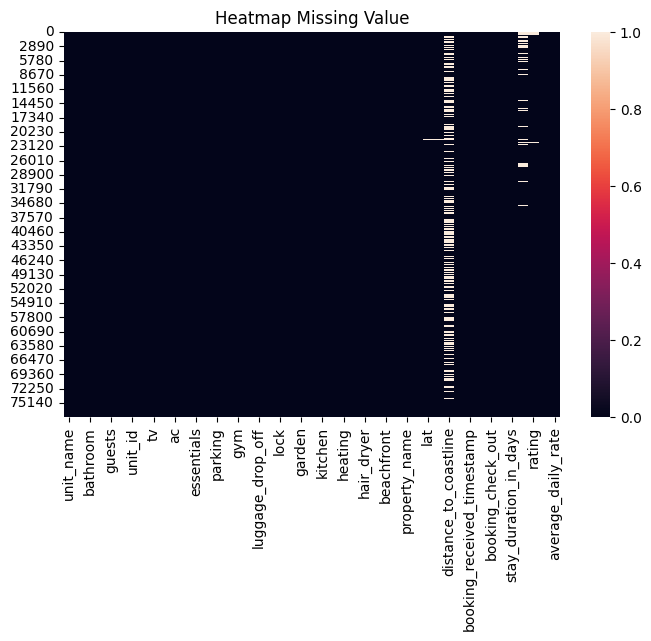

In [67]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull())
plt.title('Heatmap Missing Value')
plt.show()

Disini, kami melakukan visualisasi terkait missing value untuk mendapatkan gambaran secara visual.

In [68]:
df.describe()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,essentials,...,property_bedrooms,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,78010.000000,77920.000000,77920.000000,77920.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.0,...,78010.000000,77816.000000,77816.000000,45343.000000,78010.000000,78010.000000,72671.000000,77230.000000,7.801000e+04,7.801000e+04
mean,1.035137,1.054864,1.047857,2.086679,0.978823,0.532265,0.089796,0.974696,0.899282,1.0,...,13.234765,-8.761119,115.146185,670.379297,28.425099,3.539892,0.631665,4.404959,2.296312e+06,6.777725e+05
std,0.306131,0.383144,0.324730,0.522380,0.143974,0.498961,0.285891,0.157049,0.300957,0.0,...,7.730403,0.103751,0.388802,1414.130566,40.994812,3.830646,0.487256,0.942341,2.977614e+06,6.287251e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,6.000000,-8.822391,115.087110,65.860300,2.000000,2.000000,0.600000,4.000000,8.501970e+05,3.801168e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,13.000000,-8.809038,115.113060,402.195000,12.000000,3.000000,0.900000,5.000000,1.463267e+06,5.001512e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,22.000000,-8.678881,115.133906,761.362000,37.000000,4.000000,0.900000,5.000000,2.700462e+06,7.801720e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,27.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


Disini, kami melihat statistik dari dataframe dengan kolom berisi data numerik.

In [69]:
for column_name in df.columns:
    # Get distinct values for each column
    distinct_values = df[column_name].unique()
    
    # Print column name and distinct values
    print("Column Name:", column_name)
    print("Distinct Values:", distinct_values, "\n")

Column Name: unit_name
Distinct Values: ['Apartment - 1 Lantai 1' 'Apartment - 2 Lantai 2' 'Standard 2'
 'Standard 1' 'Standard 3' 'Standard 4' 'Room 06 (Downstairs)'
 'Room 05 (Downstairs)' 'Room 10 (Upstairs)' 'Room 09 (Upstairs)'
 'Room 08 (Upstairs)' 'Room 04 (Downstairs)' 'Room 07 (Downstairs)'
 'Me Villa A' 'E' 'C' 'B' 'D' 'Room 01' 'Room 04' 'Room 12' 'Room 11'
 'Room 03' 'Room 09' 'Room 10' 'Room 02' 'Room 05' '224' '220' '101' '219'
 '222' '214' '215' '216' '218' '221' '217' '105' '106' '107' '104'
 'Standard 4A' 'Standard 3A' 'Bungalow 2' 'Bungalow 3' 'Bungalow 4'
 'Bungalow 1' 'Room 4' 'Room 1' 'Unit 5 (Upstairs)' 'Unit 4 (Upstairs)'
 'Unit 3 (Upstairs)' 'Unit 2 (Downstairs)' 'Unit 1 (Downstairs)'
 'Bungalow 5' 'Wooden 103' 'Pondok Lulik - Wooden 102 #T'
 'Room 08 Downstairs' 'Room 07 Downstairs' 'Room 19' 'Room 18'
 'Room 09 Downstairs' 'Room 10 Downstairs' 'Room 16 Upstairs' 'Room 20'
 'Room 21' 'Room 22' 'Room 23' 'Guesthouse 3' 'Guesthouse 2'
 'Guesthouse 1' 'Guesthouse 

Disini, kami melihat distinct value pada setiap kolom.

In [70]:
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 17259


Pada dataset Bukit Vista, memiliki jumlah data duplikat sebanyak 17.259.

## Cleaning Data

In [71]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()

columns_to_impute = ['bathroom', 
                     'beds', 
                     'guests', 
                     'lat', 
                     'lng', 
                     'distance_to_coastline', 
                     'review_sentiment_score', 
                     'rating']

# Perform imputation only on selected columns
imputed_values = mice_imputer.fit_transform(df[columns_to_impute])

# Create a DataFrame from imputed values
imputed_df = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Replace original columns with imputed values
df[columns_to_impute] = imputed_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Kami melakukan imputasi data menggunakan fancy impute atau MICE. MICE adalah Multiple Imputation by Chained Equations. Alasan kami menggunakan MICE dikarenakan missing value pada dataset terlalu banyak.

In [72]:
# Convert float columns to int
df['bathroom'] = df['bathroom'].astype(int)
df['beds'] = df['beds'].astype(int)
df['guests'] = df['guests'].astype(int)

# Convert object columns to datetime
df['booking_received_timestamp'] = pd.to_datetime(df['booking_received_timestamp'])
df['booking_check_in'] = pd.to_datetime(df['booking_check_in'])
df['booking_check_out'] = pd.to_datetime(df['booking_check_out'])

Berdasarkan info yang telah kami peroleh, maka kami mengubah tipe data pada beberapa kolom. 

In [73]:
# List of column names to drop
columns_to_drop = ['unit_name',
                   'type',
                   'unit_id', 
                   'essentials', 
                   'property_bedrooms',
                   'booking_received_timestamp',
                   'booking_check_in',
                   'booking_check_out']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

Kami melakukan drop pada beberapa kolom yang ada pada dataframe dengan alasan sebagai berikut:
1. unit_name: 
2. type:
3. unit_id:
4. essentials:
5. property_bedrooms:
6. booking_received_timestamp:
7. booking_check_in:
8. booking_check_out:

In [74]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 0


Kami menghapus data duplikat pada dataframe. Dapat dilihat bahwa jumlah data duplikat saat ini berjumlah 0 baris.

In [75]:
negative_booking_earned = df[df['booking_earned'] < 0]

negative_booking_earned.head()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,hot_water,...,lat,lng,distance_to_coastline,room_name,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
1917,1,1,1,2,1,1,0,0,1,1,...,-8.458553,115.279939,1762.532222,Villa Damuh,4,2,-0.360073,3.0,-927713.23,-463856.615
1918,1,1,1,2,1,1,0,0,1,1,...,-8.458553,115.279939,1762.532222,Villa Damuh,4,2,-0.360073,3.0,-927713.23,-463856.615
2561,2,2,2,4,1,1,0,1,1,1,...,-8.652147,115.132308,761.362000,2 BR,6,1,0.060668,3.0,-20079.50,-20079.500
2562,2,2,2,4,1,1,0,1,1,1,...,-8.652147,115.132308,761.362000,2BR,6,1,0.060668,3.0,-20079.50,-20079.500
2563,1,1,1,2,1,1,0,1,1,1,...,-8.652147,115.132308,761.362000,1BR,6,1,0.047091,3.0,-20079.50,-20079.500


Kami menemukan bahwa terdapat beberapa baris yang memiliki nilai booking_earned negatif. Booking_earned merupakan jumlah uang yang didapatkan dalam penyewaan properti. Oleh karena itu, tidak memungkinkan bahwa booking_earned tersebut bernilai negatif.

In [76]:
# Directly changing negative values to positive in the original DataFrame
df.loc[df['booking_earned'] < 0, 'booking_earned'] = df['booking_earned'].abs()

print("Jumlah row dengan negative booking earned saat ini :", df[df['booking_earned'] < 0].shape[0])

Jumlah row dengan negative booking earned saat ini : 0


Sehingga, kami mengubah beberapa baris yang memiliki nilai booking_earned yang semula negatif menjadi positif.

In [77]:
zero_booking_earned = df[df['booking_earned'] == 0]

zero_booking_earned.head()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,hot_water,...,lat,lng,distance_to_coastline,room_name,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
68,1,1,1,2,1,0,0,1,1,1,...,-8.805646,115.113378,15.6035,Bingin Ombak Apartment - 1 Lantai 1,3,7,0.611226,4.364623,0.0,0.0
69,1,1,1,2,1,0,0,1,1,0,...,-8.805646,115.113378,15.6035,Bingin Ombak Apartment - 2 Lantai 2,3,7,0.611226,4.364623,0.0,0.0
71,1,2,1,2,1,0,0,0,1,0,...,-8.805646,115.113378,15.6035,Standard (PLEASE IGNORE),3,7,0.634964,4.428867,0.0,0.0
72,1,2,1,2,1,0,0,0,1,0,...,-8.805646,115.113378,15.6035,Standard (PLEASE IGNORE),3,7,0.634964,4.428867,0.0,0.0
73,1,3,1,2,1,0,0,0,1,0,...,-8.805646,115.113378,15.6035,Standard (PLEASE IGNORE),3,7,0.658702,4.493110,0.0,0.0


Kami menemukan bahwa terdapat beberapa baris yang memiliki nilai booking_earned nol. Booking_earned merupakan jumlah uang yang didapatkan dalam penyewaan properti. Oleh karena itu, tidak memungkinkan bahwa booking_earned tersebut bernilai nol.

In [78]:
print("Jumlah row dengan nol booking earned saat ini :", df[df['booking_earned'] == 0].shape[0])

Jumlah row dengan nol booking earned saat ini : 283


Kami menghapus baris pada dataframe yang memiliki nilai booking earned nol.

In [79]:
print("Dataset Bukit Vista setelah preprocessing memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista setelah preprocessing memiliki 50728 baris dan 39 kolom


Setelah dilakukan preprocessing, dataset Bukit Vista saat ini memiliki jumlah baris sebanyak 50.445 dan jumlah kolom sebanyak 40.

## Exploratory Data Analysis

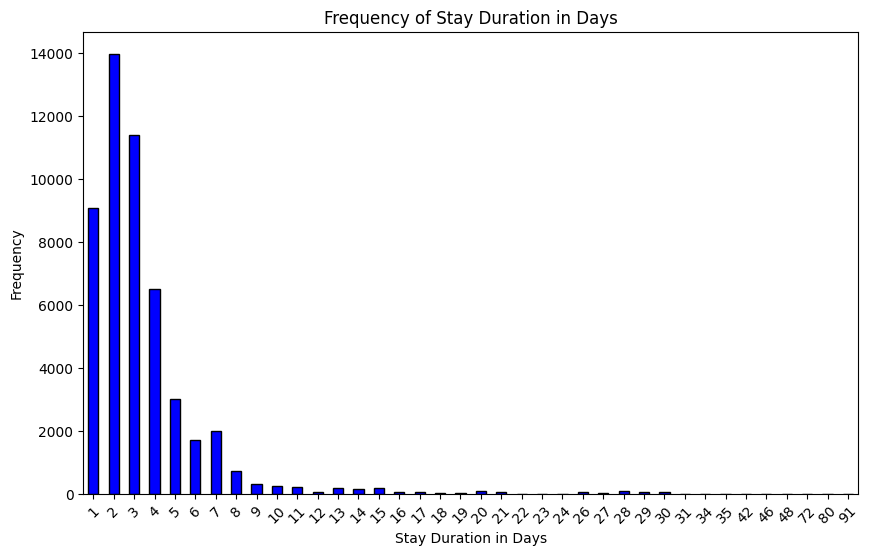

In [80]:
# cari stay in day biasanya berapa
stay_duration_count = df['stay_duration_in_days'].value_counts().sort_index()

# buat plotnya
plt.figure(figsize=(10, 6))
stay_duration_count.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Stay Duration in Days')
plt.ylabel('Frequency')
plt.title('Frequency of Stay Duration in Days')
plt.xticks(rotation=45)
plt.show()

Disini kami mencari tahu pada umumnya, seberapa lama tamu menginap pada properti-properti yang dikelola oleh Bukit Vista. Dapat dilihat bahwa kebanyakan tamu menginap selama 2 hari.

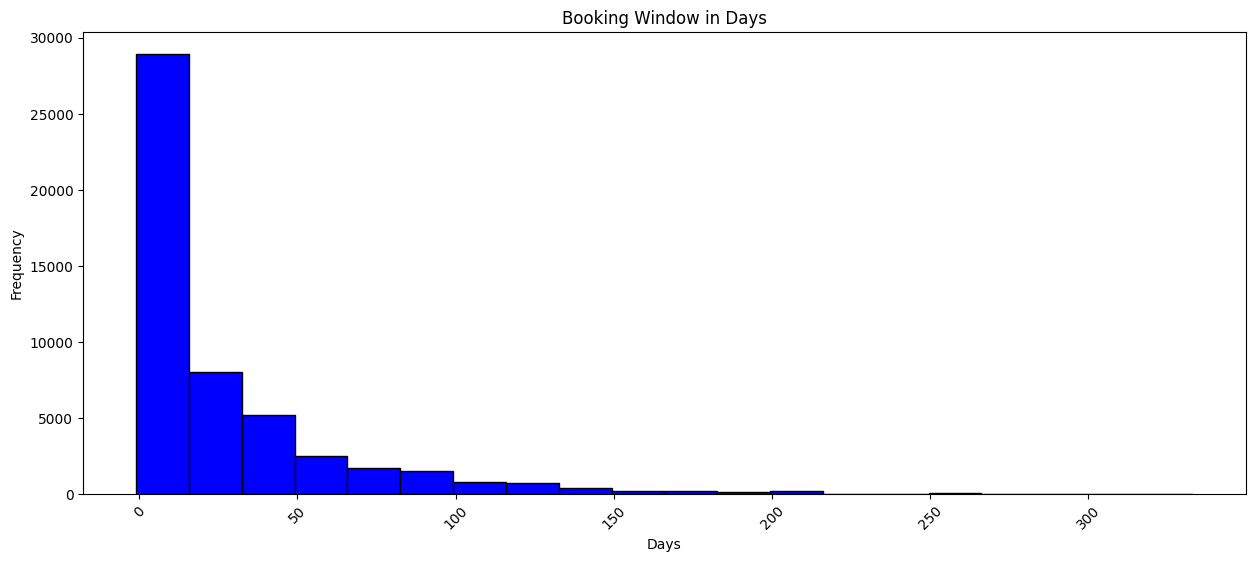

In [81]:
 # buat plotnya
plt.figure(figsize=(15, 6))
plt.hist(df['booking_window'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Booking Window in Days')
plt.xticks(rotation=45)
plt.show()

Disini, kami mencari tahu berapa frekuensi booking window dengan histogram yang memiliki 20 bins. Dapat dilihat bahwa data condong ke kanan.

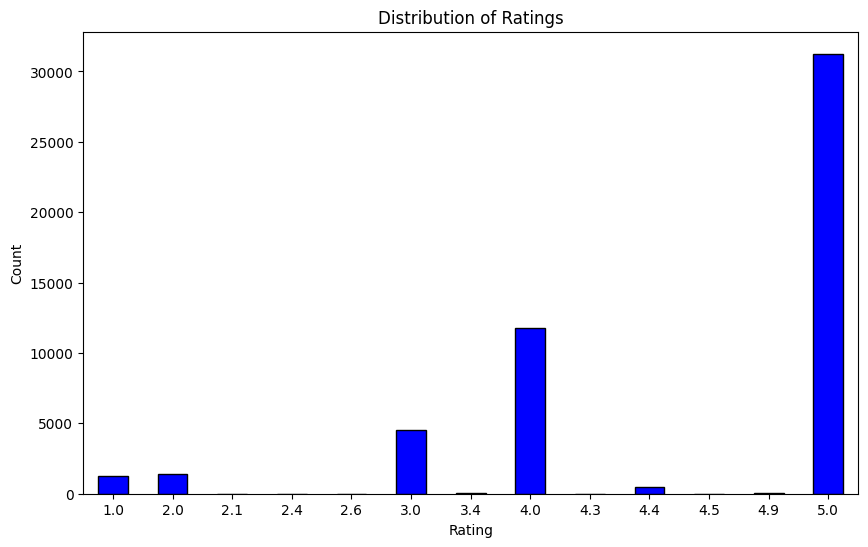

In [82]:
# Create a new DataFrame with the rounded rating column
df_rounded = df.copy()
df_rounded['rating_rounded'] = df['rating'].round(1)

# Count the occurrences of each rounded rating
rating_counts = df_rounded['rating_rounded'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal

# Show the plot
plt.show()

Disini, kami mencari tahu sebaran dari kolom rating. Dapat dilihat bahwa kebanyakan tamu menilai properti-properti yang dikelola oleh Bukit Vista dengan nilai 5.

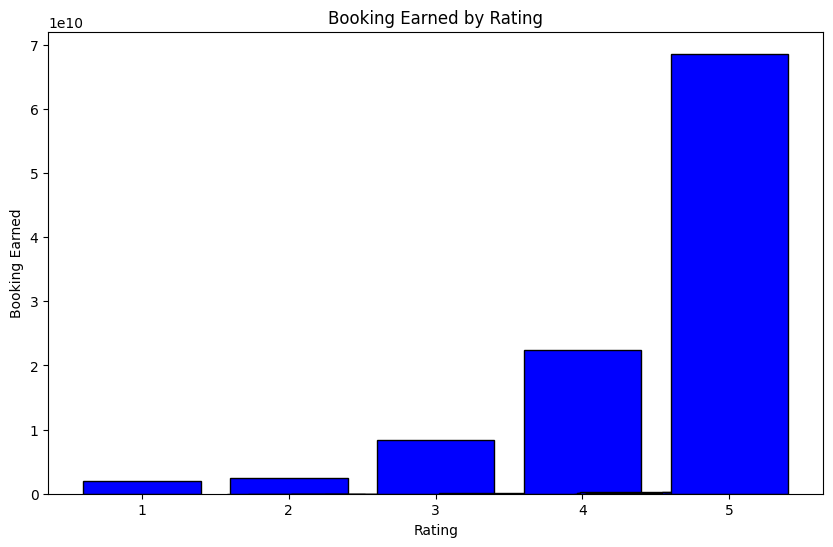

In [83]:
# Menggambarkan korelasi antara penilaian properti dengan pemasukkan properti
rating_booking = df.groupby('rating')['booking_earned'].sum().reset_index()

rating_booking = rating_booking.sort_values(by='rating')

plt.figure(figsize=(10, 6))
plt.bar(rating_booking['rating'], rating_booking['booking_earned'], color='blue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Booking Earned')
plt.title('Booking Earned by Rating')
plt.show()

Disini, kami membuat diagram batang untuk mencari tahu apakah ada relasi antara penilaian properti dengan keuntungan yang didapat oleh properti tersebut. Dapat dilihat bahwa terdapat korelasi antara penilaian properti dengan pemasukkan yang didapat oleh properti tersebut.

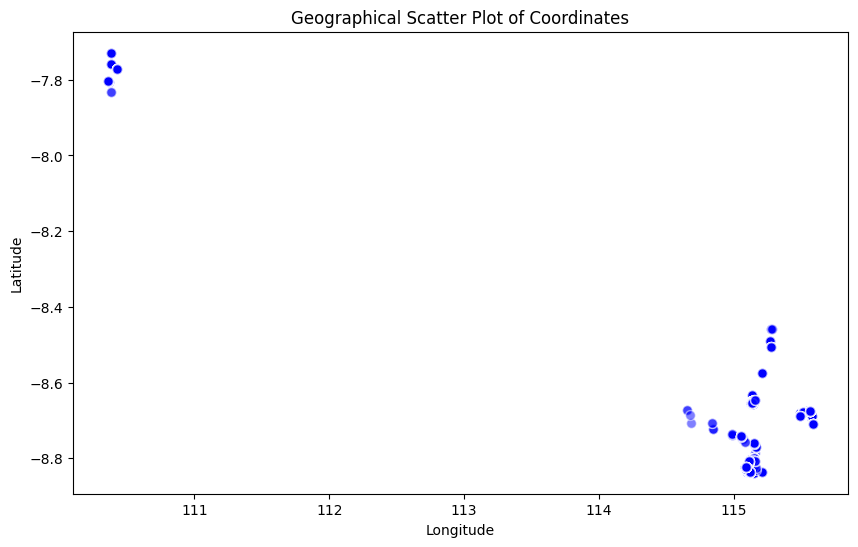

In [84]:
# visualisasi lat dan lng
plt.figure(figsize=(10, 6))
plt.scatter(df['lng'], df['lat'], c='blue', alpha=0.5, edgecolors='w', s=50)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Scatter Plot of Coordinates')

# Show the plot
plt.show()

Disini kami mencoba untuk memvisualisasikan koordinat yang ada pada kolom "lat" dan "lng".

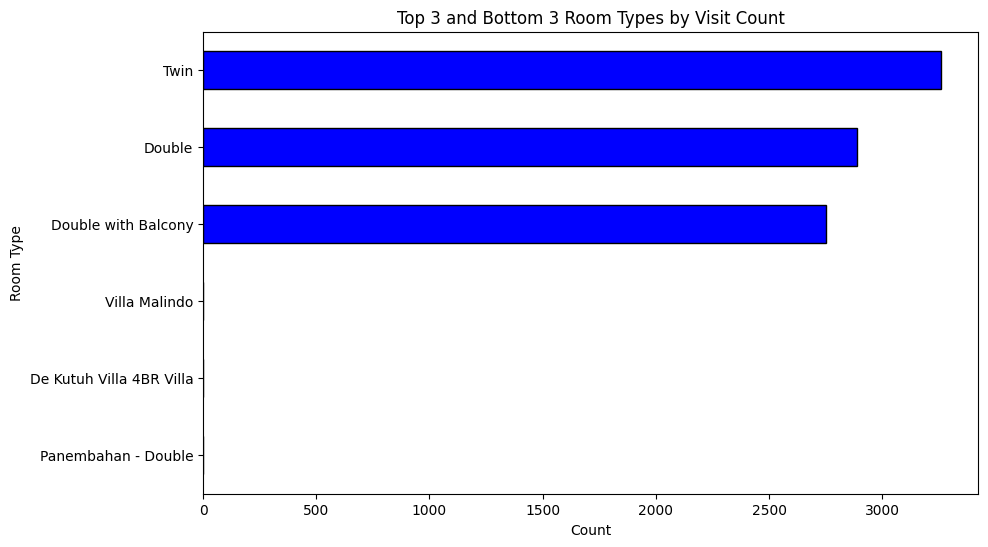

In [85]:
# Count the occurrences of each room name and sort them
type_counts = df['room_name'].value_counts().sort_values()

# Get the top 3 and bottom 3 room types
top_3 = type_counts[-3:]
bottom_3 = type_counts[:3]

# Concatenate top 3 and bottom 3
top_bottom_3 = pd.concat([bottom_3, top_3])

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_bottom_3.plot(kind='barh', color='blue', edgecolor='black')  # Use horizontal bar chart

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.title('Top 3 and Bottom 3 Room Types by Visit Count')

# Show the plot
plt.show()

Disini kami memvisualisasikan perbedaan jumlah pengunjung berdasarkan nama ruangan, dan menampilkan hanya berdasarkan 3 terbanyak dan 3 terendah.

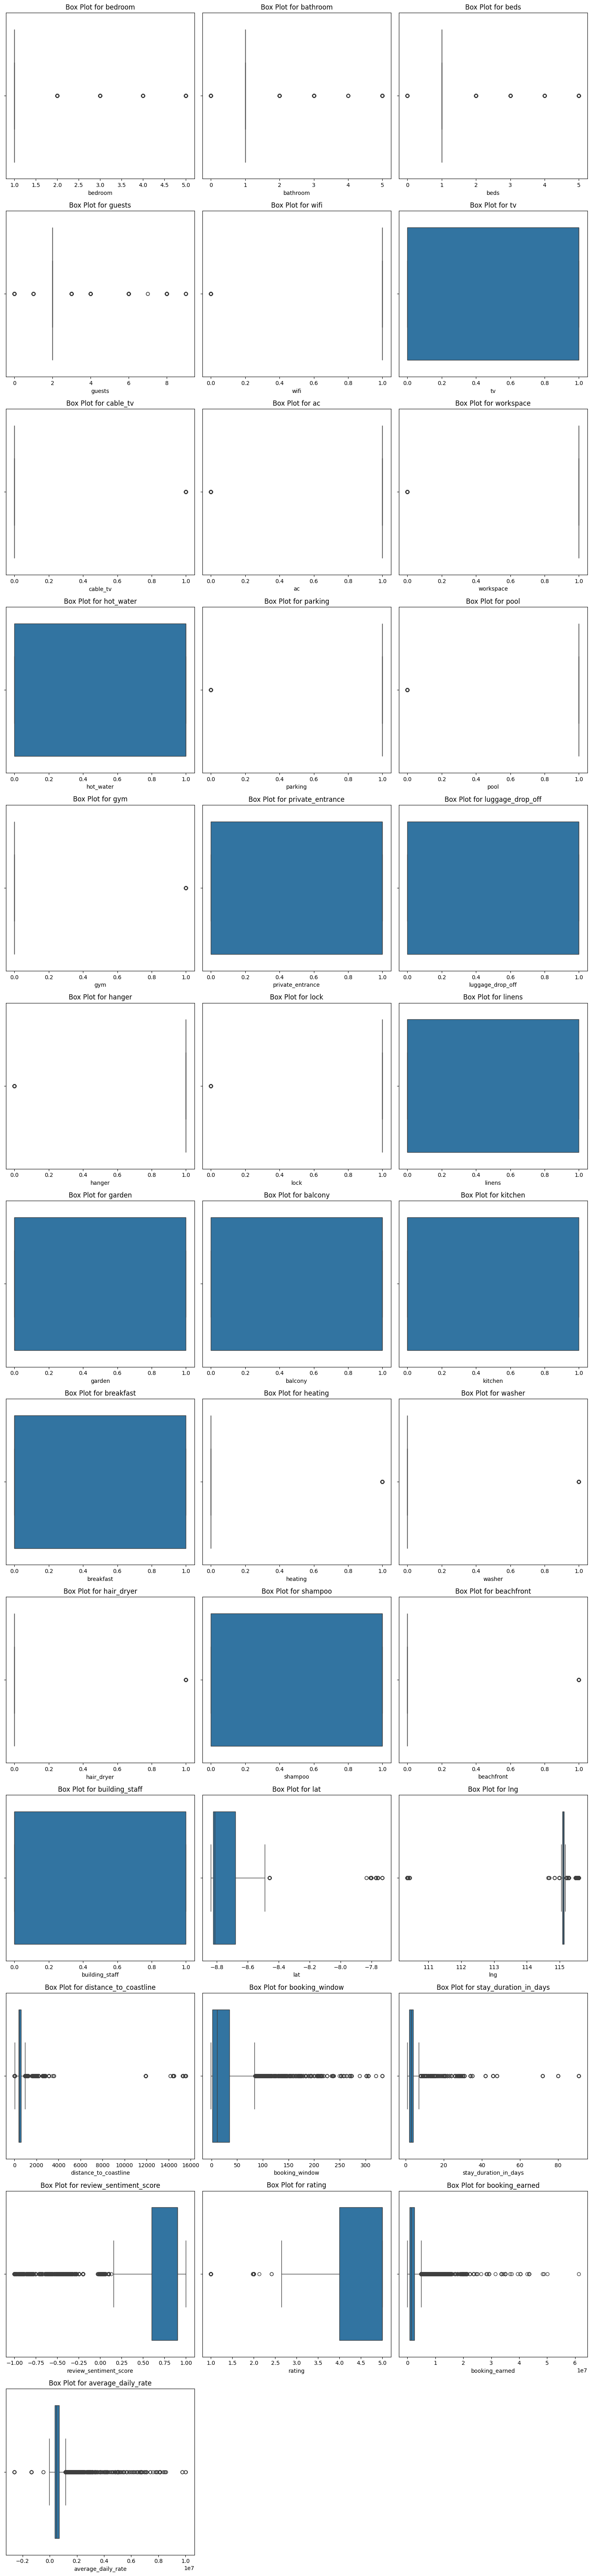

In [86]:
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(df.select_dtypes(include=['number'])):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

Disini, kami melakukan visualisasi menggunakan boxplot untuk mencari outlier.

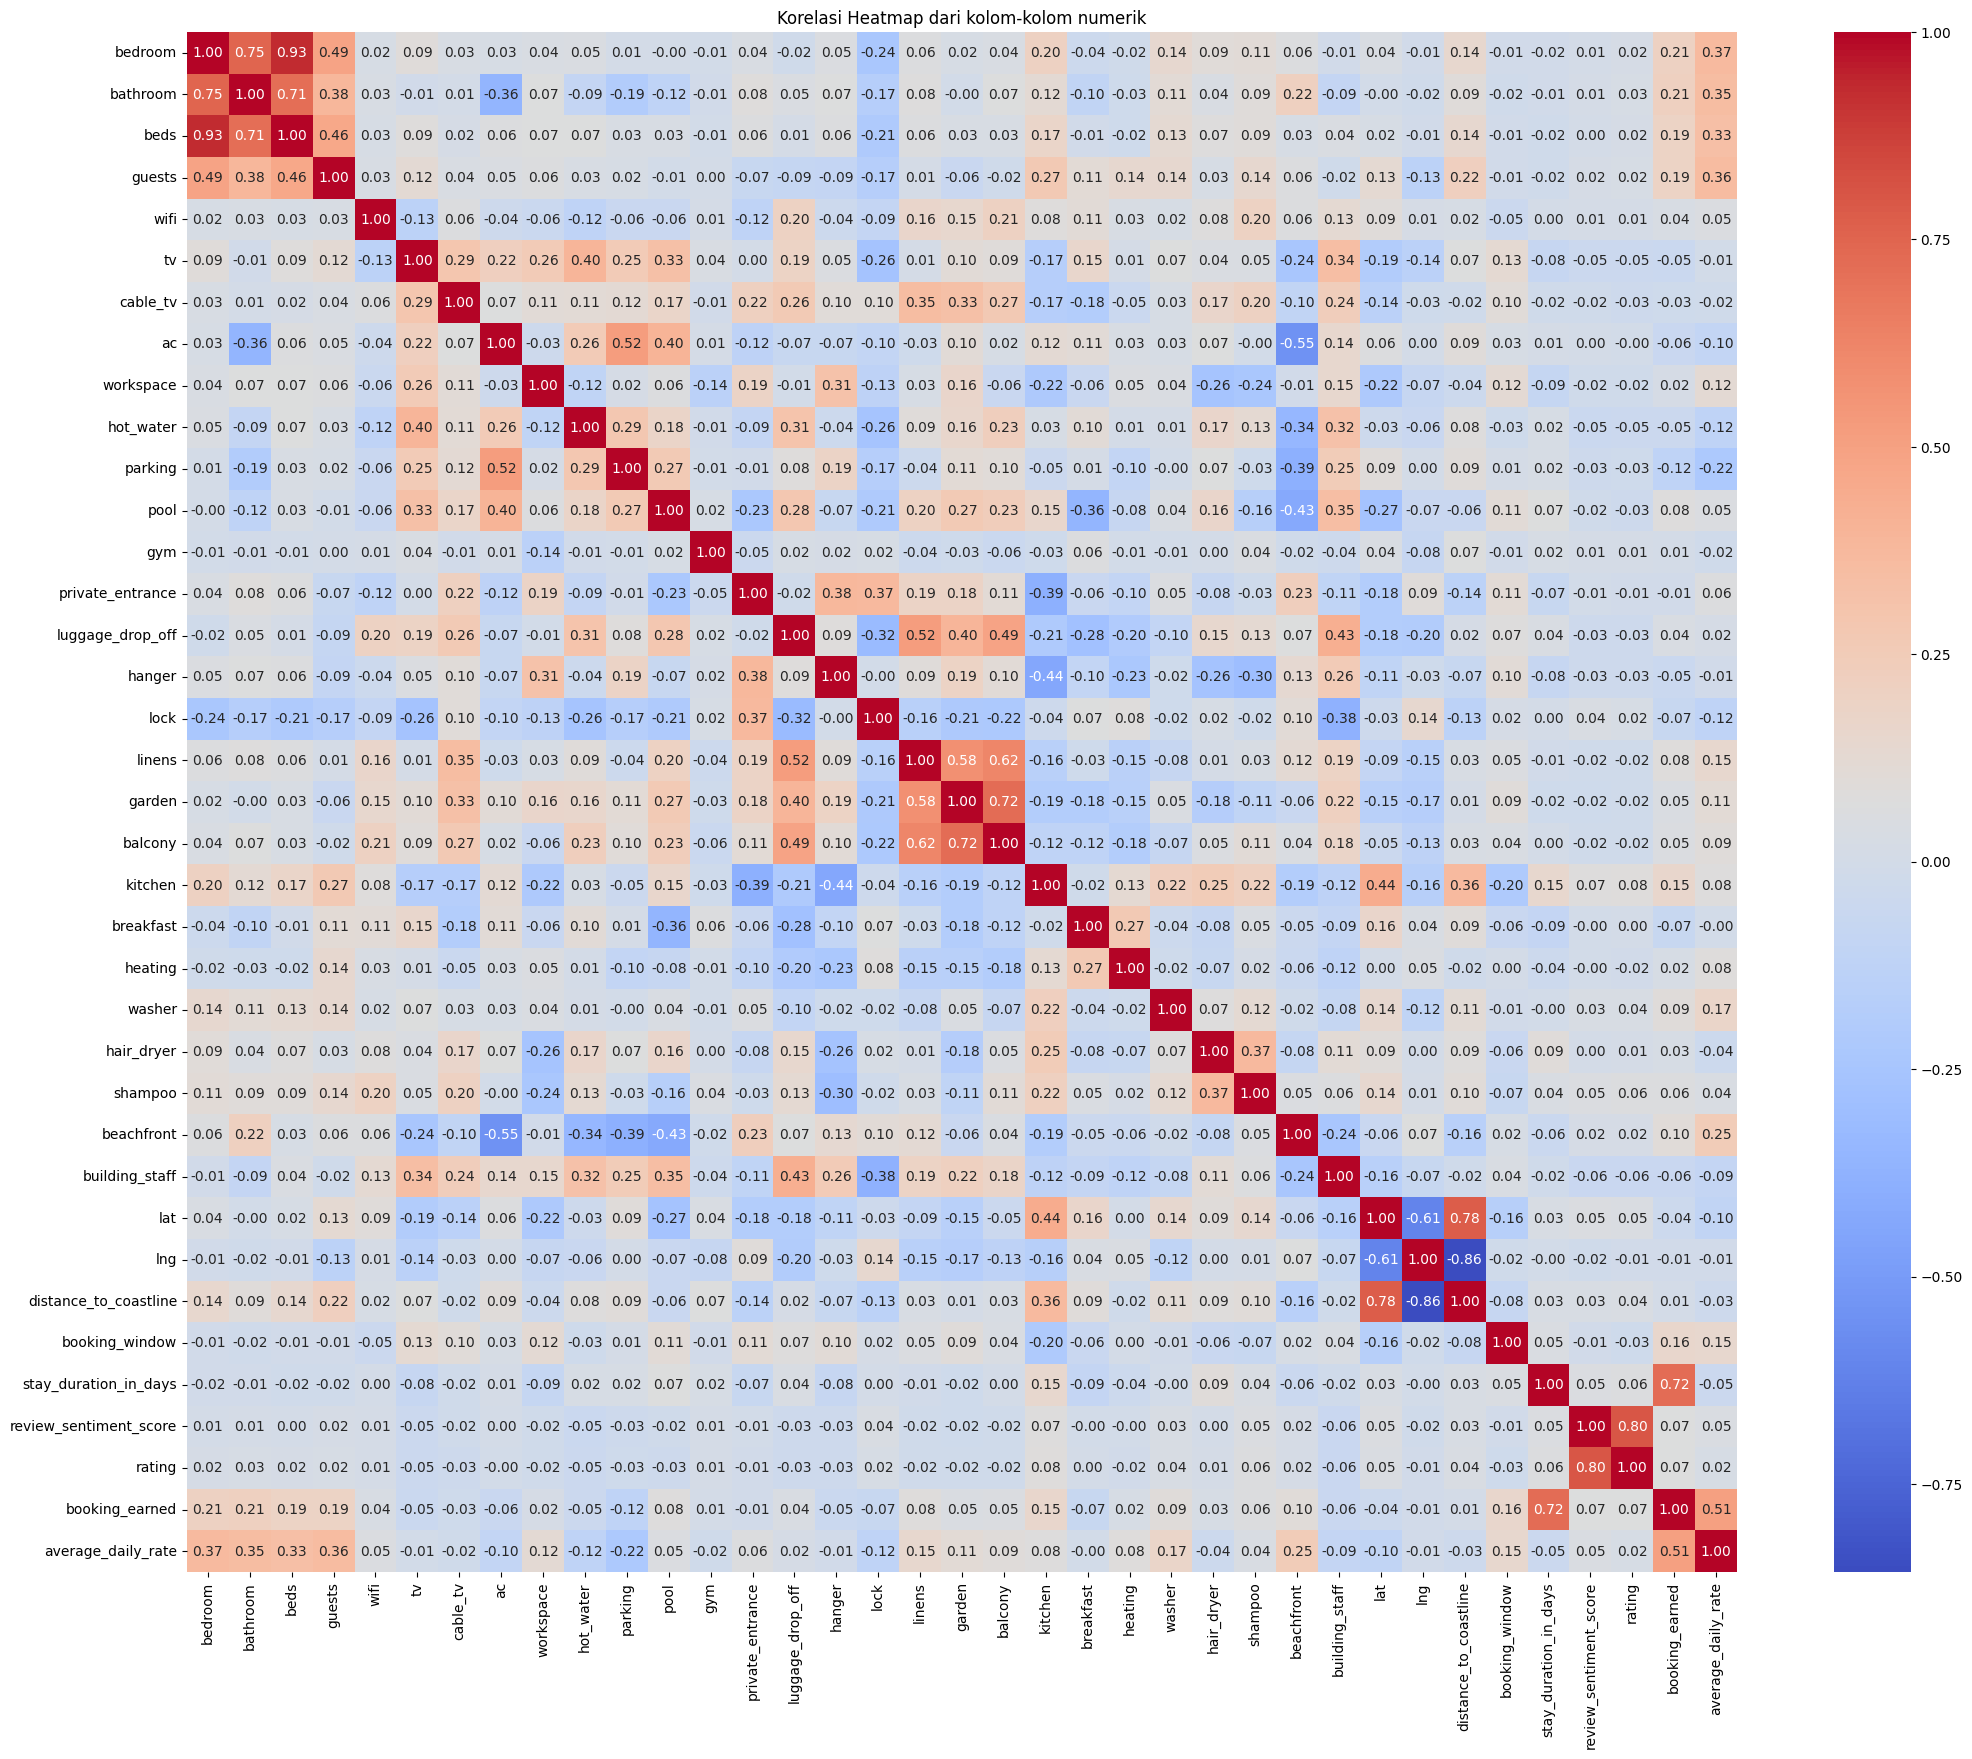

In [87]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik')
plt.show()

Disini, kami memvisualisasikan korelasi antara semua kolom numerik, dan diberi warna berdasarkan tingkat korelasinya menggunakan heatmap.

In [93]:
# List of column names to drop
columns_to_drop = ['property_name', 
                   'room_name', 
                   'average_daily_rate']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [94]:
# cara mendownload data hasil preprocessing :
path = os.path.join(os.path.dirname(raw_data_path), 'preprocessed_data.csv')
df.to_csv('preprocessed_data.csv', index=False)

Kami menyimpan data hasil preprocessing dengan nama preprocessed_data.csv

In [91]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.preprocessing import StandardScaler

# # Assuming numeric_columns is your DataFrame containing numeric features
# # and 'average_daily_rate' is your target variable
# tes = numeric_columns.drop(columns=['average_daily_rate'])

# # Separate features and target variable
# X = tes.drop(columns=['booking_earned'])  # Features
# y = tes['booking_earned']  # Target variable

# # Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Initialize the Random Forest regressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# # Train the model
# rf_regressor.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_regressor.predict(X_test)

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)

# # Get feature importances
# feature_importances = rf_regressor.feature_importances_

# # Create a DataFrame to store feature importances with corresponding column names
# fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# # Sort the DataFrame by feature importance values
# fi_df = fi_df.sort_values(by='Importance', ascending=False)

# # Print feature importances
# print("\nFeature Importances:")
# print(fi_df)